In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
full_df = pd.read_csv('./saved-items/cleaned_dataset.csv')

full_df.head()

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single   58138        0         0   
1  2174        1954  Graduation         Single   46344        1         1   
2  4141        1965  Graduation       Together   71613        0         0   
3  6182        1984  Graduation       Together   26646        1         0   
4  5324        1981         PhD        Married   58293        1         0   

  Dt_Customer  Recency  Wines  ...  AcceptedCmp1  AcceptedCmp2  Complain  \
0  2012-09-04       58    635  ...             0             0         0   
1  2014-03-08       38     11  ...             0             0         0   
2  2013-08-21       26    426  ...             0             0         0   
3  2014-02-10       26     11  ...             0             0         0   
4  2014-01-19       94    173  ...             0             0         0   

   Response  CustomerAge  Seniority  Relationship_Status  \
0         1           65       9.67                Alone   
1         0           68       8.16                Alone   
2         0           57       8.71         Relationship   
3         0           38       8.23         Relationship   
4         0           41       8.29         Relationship   

   Simplified_Education  TotalChildren  HasChild  
0          Postgraduate              0         0  
1          Postgraduate              2         1  
2          Postgraduate              0         0  
3          Postgraduate              1         1  
4          Postgraduate              1         1  

[5 rows x 33 columns]

In [3]:
full_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'CustomerAge', 'Seniority',
       'Relationship_Status', 'Simplified_Education', 'TotalChildren',
       'HasChild'],
      dtype='object')

In [4]:
column_filter = ['Income', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 
                 'Gold', 'Seniority']

df = full_df[column_filter].copy()
df.head()

Income  Recency  Wines  Fruits  Meat  Fish  Sweets  Gold  Seniority
0   58138       58    635      88   546   172      88    88       9.67
1   46344       38     11       1     6     2       1     6       8.16
2   71613       26    426      49   127   111      21    42       8.71
3   26646       26     11       4    20    10       3     5       8.23
4   58293       94    173      43   118    46      27    15       8.29

# Convert Categorical Data to Numerical Data

In [5]:
# # One Hot Encode Education column
# df['EducationNumber'] = df['Simplified_Education'].apply(lambda x: 1 if x == "Postgraduate" else 0)

# # Label Encode Education column
# df['Undergrad'] = df['Simplified_Education'].apply(lambda x: 1 if x == "Undergraduate" else 0)
# df['Postgrad']  = df['Simplified_Education'].apply(lambda x: 1 if x == "Postgraduate" else 0)

# # Label Encode the Relationship Status column
# df['Single'] = df['Relationship_Status'].apply(lambda x: 1 if x == 'Alone' else 0)
# df['Relationship'] = df['Relationship_Status'].apply(lambda x: 1 if x == 'Relationship' else 0)

# # Drop the original Education and Relationship Status columns
# X = df.drop(['Simplified_Education', 'Relationship_Status'], axis=1)

In [6]:
X = df.copy()

In [7]:
X.head()

Income  Recency  Wines  Fruits  Meat  Fish  Sweets  Gold  Seniority
0   58138       58    635      88   546   172      88    88       9.67
1   46344       38     11       1     6     2       1     6       8.16
2   71613       26    426      49   127   111      21    42       8.71
3   26646       26     11       4    20    10       3     5       8.23
4   58293       94    173      43   118    46      27    15       8.29

In [8]:
X.dtypes

Income         int64
Recency        int64
Wines          int64
Fruits         int64
Meat           int64
Fish           int64
Sweets         int64
Gold           int64
Seniority    float64
dtype: object

In [9]:
X.corr()

Income   Recency     Wines    Fruits      Meat      Fish  \
Income     1.000000  0.002992  0.679342  0.502208  0.687228  0.515354   
Recency    0.002992  1.000000  0.011474 -0.013072  0.013150 -0.002470   
Wines      0.679342  0.011474  1.000000  0.384230  0.561126  0.394122   
Fruits     0.502208 -0.013072  0.384230  1.000000  0.545114  0.590013   
Meat       0.687228  0.013150  0.561126  0.545114  1.000000  0.568366   
Fish       0.515354 -0.002470  0.394122  0.590013  0.568366  1.000000   
Sweets     0.518418  0.022353  0.383063  0.559897  0.528398  0.586045   
Gold       0.375072  0.010985  0.391575  0.396304  0.350980  0.418646   
Seniority -0.016803  0.031016  0.173491  0.079903  0.094938  0.091017   

             Sweets      Gold  Seniority  
Income     0.518418  0.375072  -0.016803  
Recency    0.022353  0.010985   0.031016  
Wines      0.383063  0.391575   0.173491  
Fruits     0.559897  0.396304   0.079903  
Meat       0.528398  0.350980   0.094938  
Fish       0.586045  0.418646   0.091017  
Sweets     1.000000  0.362329   0.092366  
Gold       0.362329  1.000000   0.176176  
Seniority  0.092366  0.176176   1.000000

In [10]:
# num_df['Total'] = num_df.iloc[:,2:8].sum(axis=1)

# Scale the Data
We will scale the data to take any value between 0 and 1.

In [11]:
scaler = MinMaxScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X_scaled.head()

Income   Recency     Wines    Fruits      Meat      Fish    Sweets  \
0  0.351086  0.585859  0.425318  0.442211  0.316522  0.664093  0.335878   
1  0.277680  0.383838  0.007368  0.005025  0.003478  0.007722  0.003817   
2  0.434956  0.262626  0.285332  0.246231  0.073623  0.428571  0.080153   
3  0.155079  0.262626  0.007368  0.020101  0.011594  0.038610  0.011450   
4  0.352051  0.949495  0.115874  0.216080  0.068406  0.177606  0.103053   

       Gold  Seniority  
0  0.274143   0.947917  
1  0.018692   0.161458  
2  0.130841   0.447917  
3  0.015576   0.197917  
4  0.046729   0.229167

In [12]:
clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
scores   = {}
inertias = {}

for i in clusters:
    kmeans = KMeans(n_clusters=i, n_init=50)  # , algorithm='full')
    kmeans.fit(X_scaled)
    scores[i] = silhouette_score(X_scaled, kmeans.labels_)
    inertias[i] = kmeans.inertia_

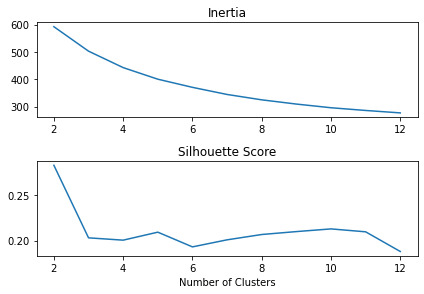

In [13]:
# Two subplots
fig, (ax1, ax2) = plt.subplots(nrows=2)

# Inertia
ax1.plot(list(inertias.keys()), list(inertias.values()))
ax1.set_title('Inertia')

# Silhouette Score
ax2.plot(list(scores.keys()), list(scores.values()))
ax2.set_title('Silhouette Score')

# Spacing
fig.tight_layout()

# X-Axis Label
plt.xlabel('Number of Clusters')

plt.show()

# Credit
The code in the following cell comes directly from the [Scikit-learn documentation](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html).

For n_clusters = 2 The average silhouette_score is : 0.4262852907117942


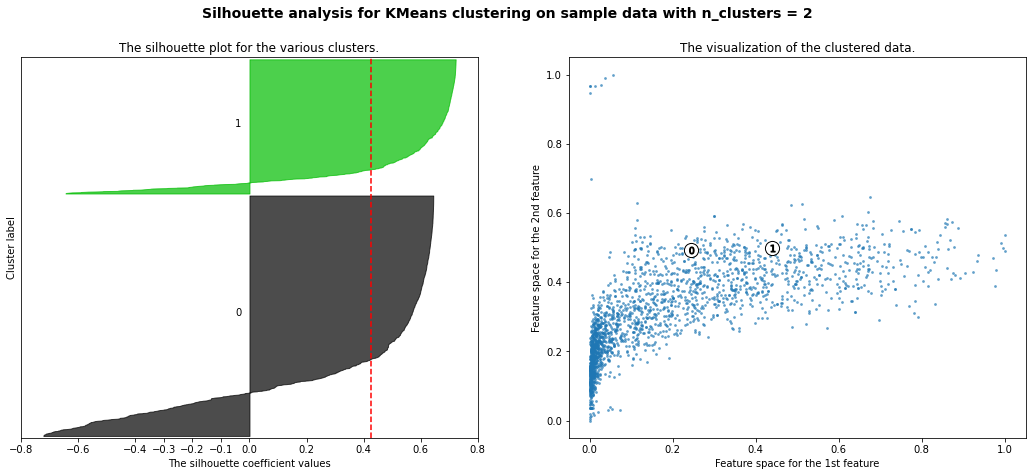

For n_clusters = 3 The average silhouette_score is : 0.09210906141379256


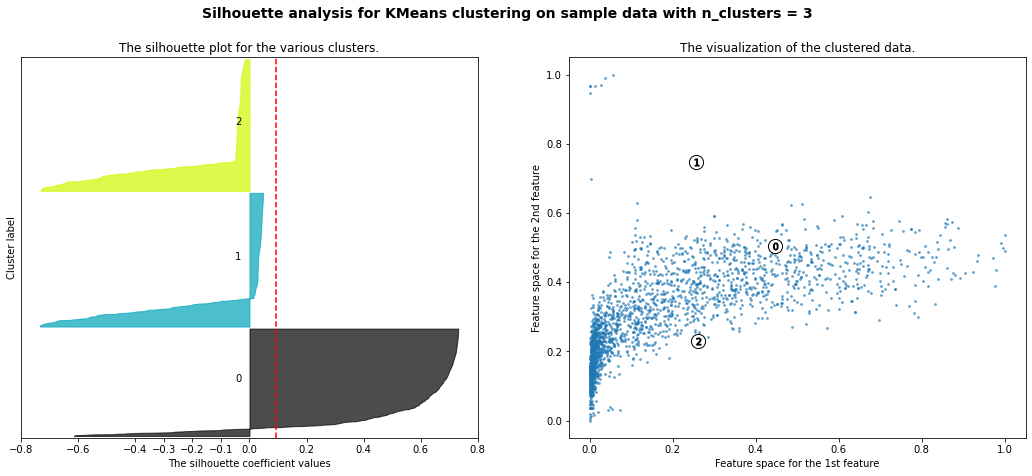

For n_clusters = 4 The average silhouette_score is : 0.04133548184705005


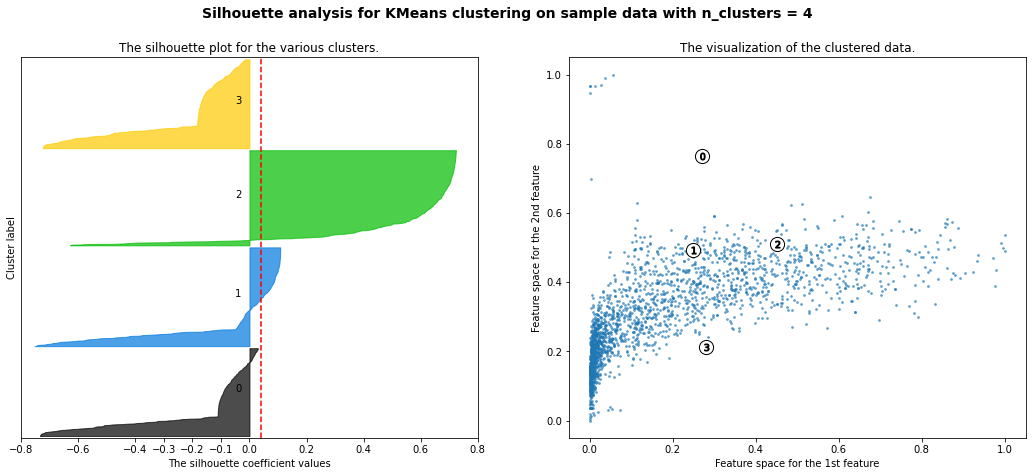

For n_clusters = 5 The average silhouette_score is : -0.10088095053229477


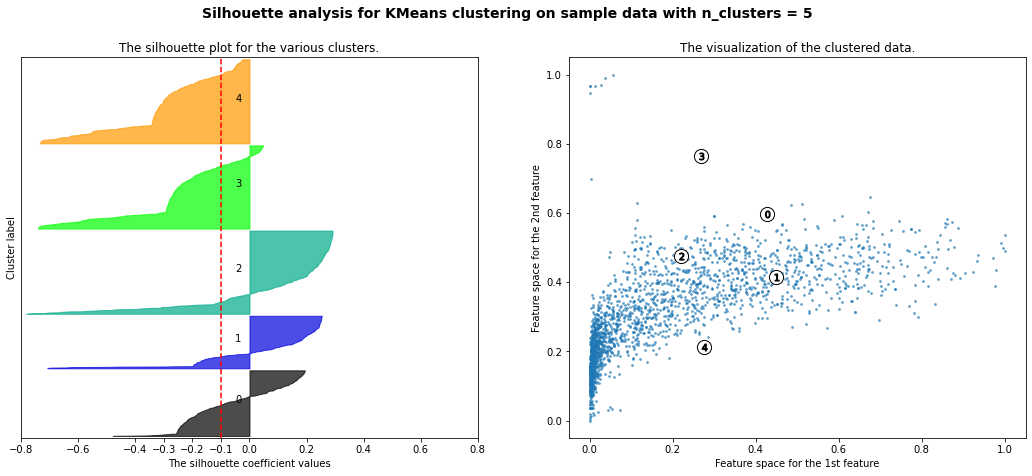

For n_clusters = 6 The average silhouette_score is : -0.13528814731246316


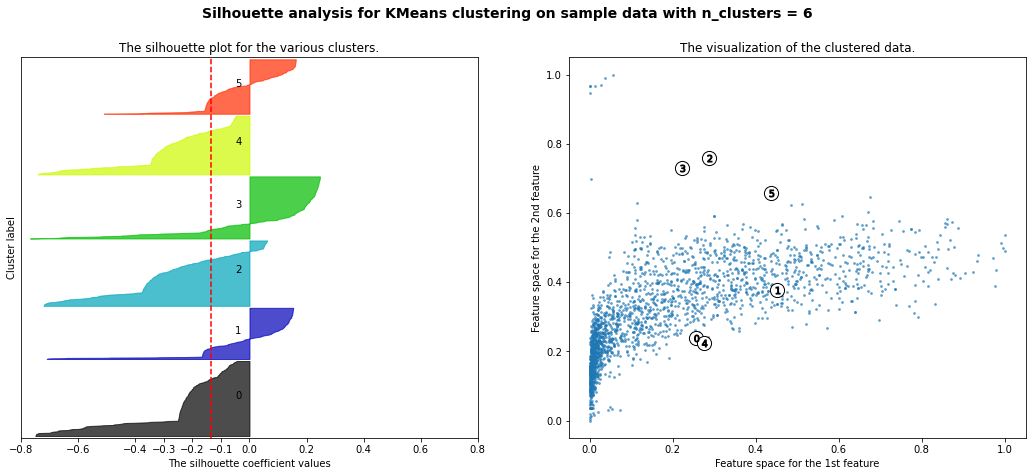

For n_clusters = 7 The average silhouette_score is : -0.12017949568200355


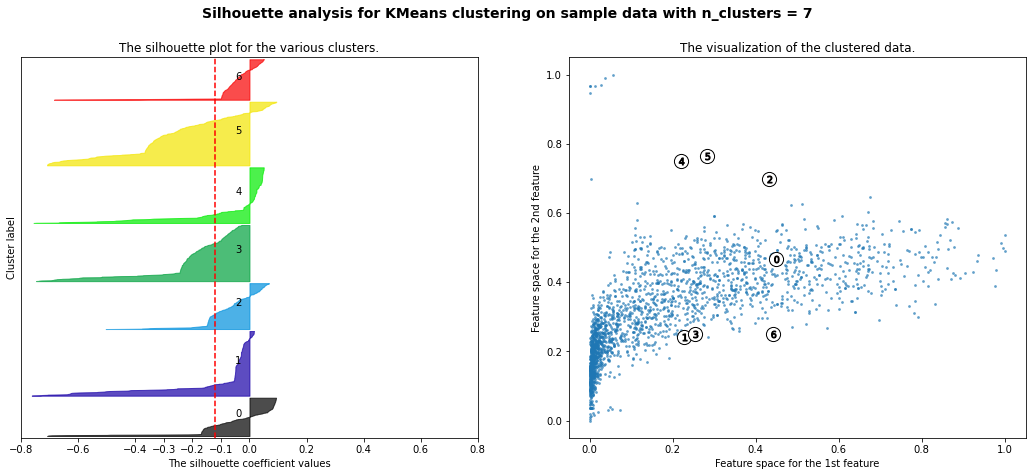

For n_clusters = 8 The average silhouette_score is : -0.11883137610112053


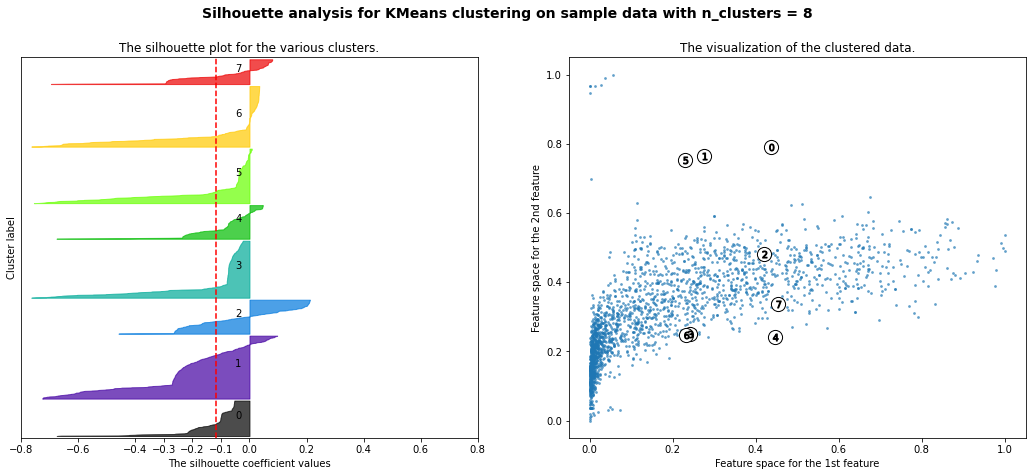

For n_clusters = 9 The average silhouette_score is : -0.15670034922099726


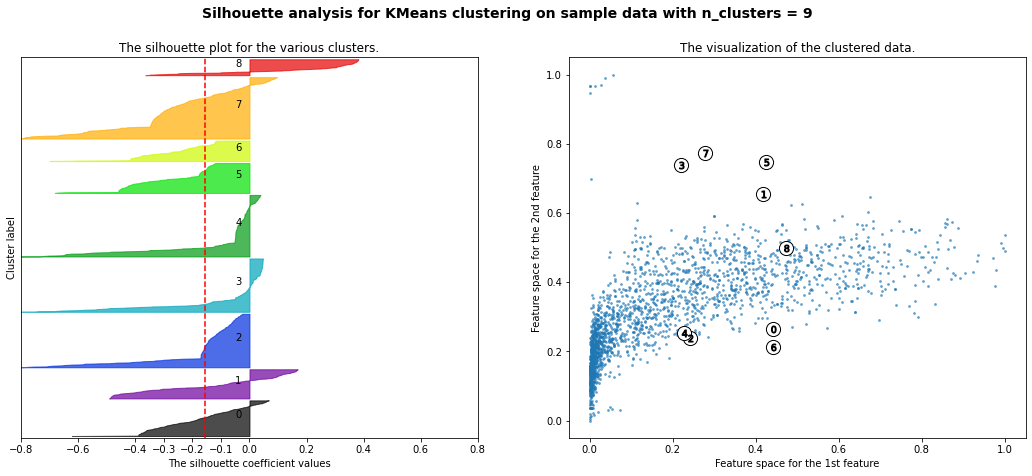

For n_clusters = 10 The average silhouette_score is : -0.1370943205998413


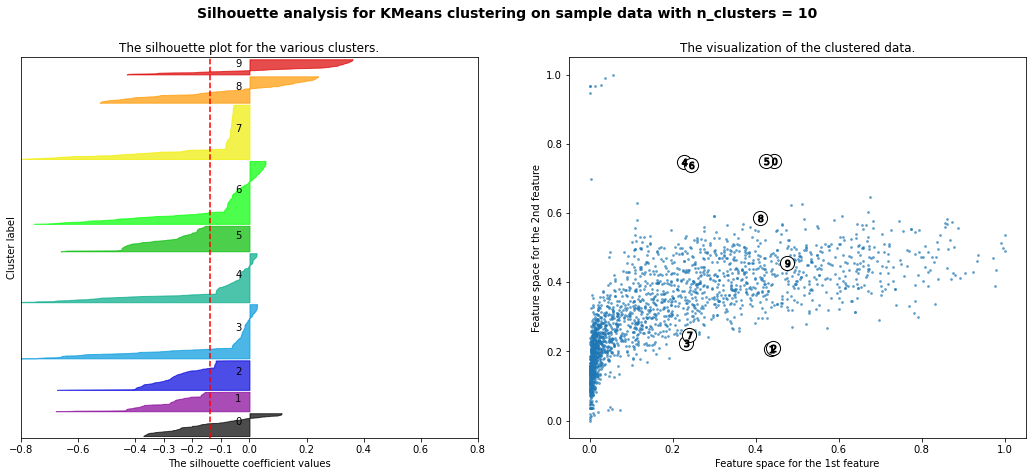

In [14]:
# Credit
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

cluster_range = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in cluster_range:
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_size_inches(18, 7)
    
    ax1.set_xlim([-0.8, 0.8])
    
    ax1.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])

    # Cluster
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_scaled)
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
        
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.8, -0.6, -0.4, -0.3, -0.2, -0.1, 0, 0.2, 0.4, 0.6, 0.8])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X_scaled['Wines'], X_scaled['Income'], marker=".", s=30, lw=0, alpha=0.7, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

    plt.show()

# Best Number of Clusters
It appears that 3 clusters is the best, according to the inertia and silhouette score.

In [15]:
kmeans = KMeans(n_clusters=5, n_init=100, algorithm='full', random_state=10)
kmeans.fit(X_scaled)

KMeans(algorithm='full', n_clusters=5, n_init=100, random_state=10)

In [16]:
# Create copies of the dataframes
X_labeled = X.copy()
X_scaled_labeled = X_scaled.copy()

# Add the labels to the dataframes
X_labeled['labels'] = kmeans.labels_
X_scaled_labeled['labels'] = kmeans.labels_

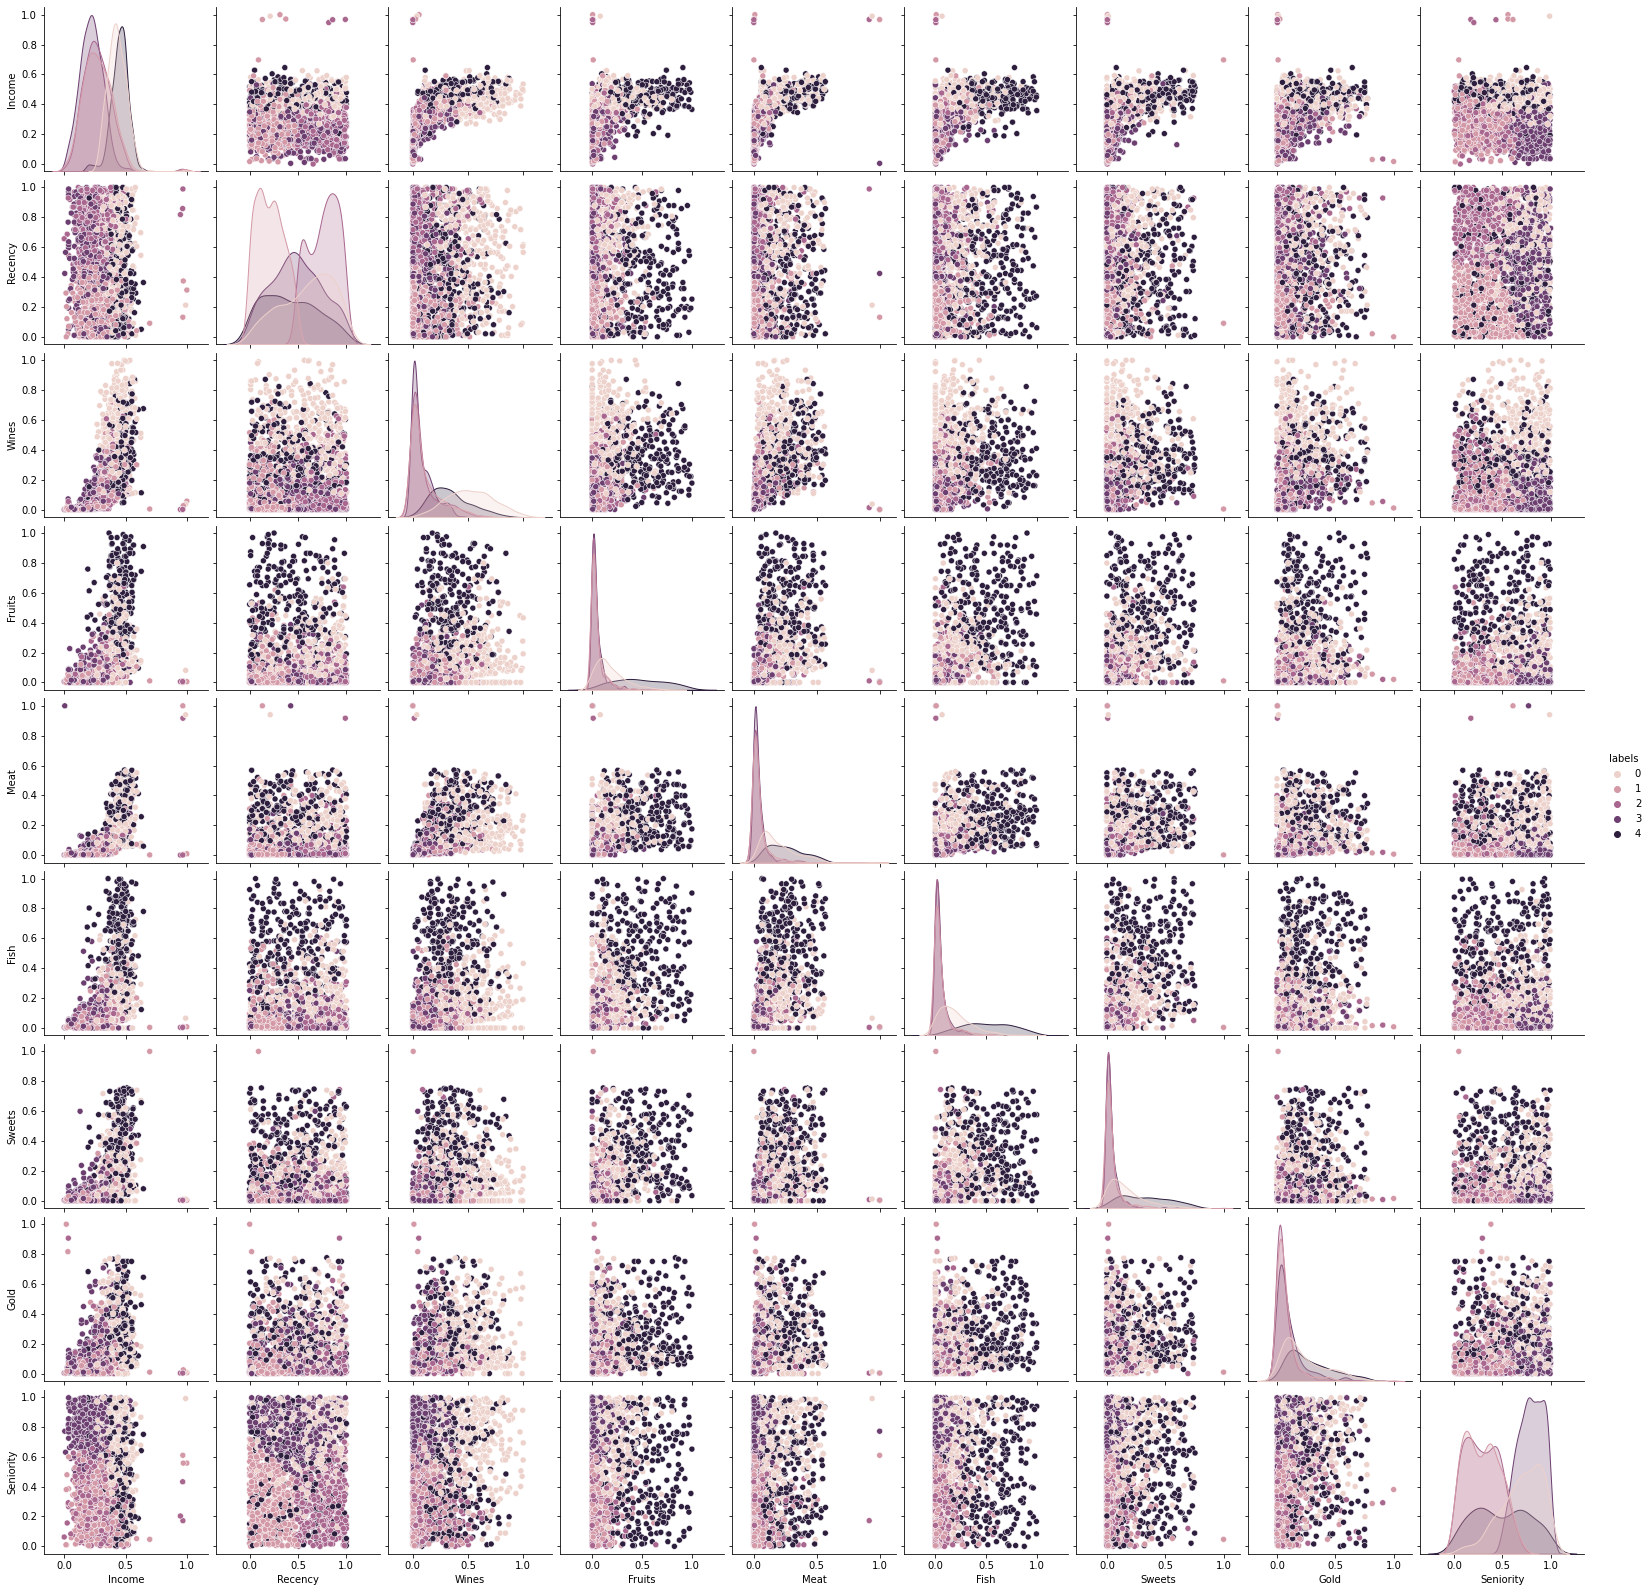

In [17]:
sns.pairplot(X_scaled_labeled, hue='labels')
plt.show()

# Save the Labeled Dataset
We will save the labeled dataset as a CSV file

In [18]:
# csv file
X_labeled.to_csv("./saved-items/labeled_dataset.csv", index=False)